## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import tensorflow.keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = tensorflow.keras.layers.Input([x_train.shape[-1]])
    x = tensorflow.keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = tensorflow.keras.layers.Dense(units=256, activation="relu")(x)
    x = tensorflow.keras.layers.Dense(units=128, activation="relu")(x)
    x = tensorflow.keras.layers.Dense(units=64, activation="relu")(x)
    out = tensorflow.keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = tensorflow.keras.optimizers.SGD(lr=0.005)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

och 364/500
196/196 [==============================] - 4s 21ms/step - loss: 0.1996 - accuracy: 0.9444 - val_loss: 2.3348 - val_accuracy: 0.5305
Epoch 365/500
196/196 [==============================] - 4s 20ms/step - loss: 0.1146 - accuracy: 0.9735 - val_loss: 2.2996 - val_accuracy: 0.5394
Epoch 366/500
196/196 [==============================] - 4s 20ms/step - loss: 0.1749 - accuracy: 0.9578 - val_loss: 2.4396 - val_accuracy: 0.5241
Epoch 367/500
196/196 [==============================] - 4s 20ms/step - loss: 0.2105 - accuracy: 0.9447 - val_loss: 2.4068 - val_accuracy: 0.5276
Epoch 368/500
196/196 [==============================] - 4s 21ms/step - loss: 0.1961 - accuracy: 0.9498 - val_loss: 2.2938 - val_accuracy: 0.5191
Epoch 369/500
196/196 [==============================] - 4s 20ms/step - loss: 0.2069 - accuracy: 0.9464 - val_loss: 2.3730 - val_accuracy: 0.5271
Epoch 370/500
196/196 [==============================] - 4s 21ms/step - loss: 0.1700 - accuracy: 0.9592 - val_loss: 2.4329 - v

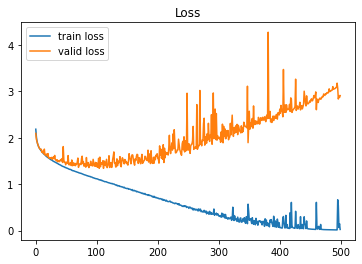

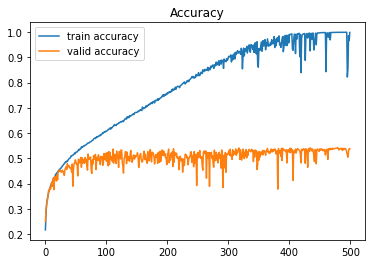

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()